# Import Statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Types and Summary

In [3]:
movie_df = pd.read_csv("movie.csv")
movie_df.head() # viewing only the head of the dataset

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [4]:
movie_df.columns

Index(['Genre', 'Rotten Tomatoes', 'IMDB', 'Audience Ratings', 'Budget_M',
       'Sales Revenue_M', 'Year of Release'],
      dtype='object')

In [5]:
movie_size=movie_df.shape
print("Dataset Size:",movie_size)

Dataset Size: (101, 7)


In [6]:
# checking each column and what datatype it stores
data_types=movie_df.dtypes
print(data_types)

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object


# Descriptive Statistics

In [7]:
movie_df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


# Variance Analysis

In [23]:
np.var(movie_df['Rotten Tomatoes'], ddof=1)

1151.3433333333335

In [24]:
np.var(movie_df['IMDB'],ddof=1)

6.874217171717172

In [25]:
np.var(movie_df['Audience Ratings'], ddof=1)

8349049.663030303

In [26]:
np.var(movie_df['Budget_M'], ddof=1)

649924946.0848624

In [27]:
np.var(movie_df['Sales Revenue_M'], ddof=1)

24671.781097879084

#### There exists to be a high variance in the two Scores and Budget ($M)

# Missing Value Investigation

In [9]:
# Checking for invalid entries for the numerical columns
invalid_entries=movie_df[movie_df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n",invalid_entries)

Invalid Entries:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


# Data Deduplication

In [10]:
duplicate_df = movie_df.duplicated().sum()
print("Number of Duplicated Records:",duplicate_df)

Number of Duplicated Records: 1


In [11]:
movie_df=movie_df.drop_duplicates()

# Initial Data Visualization

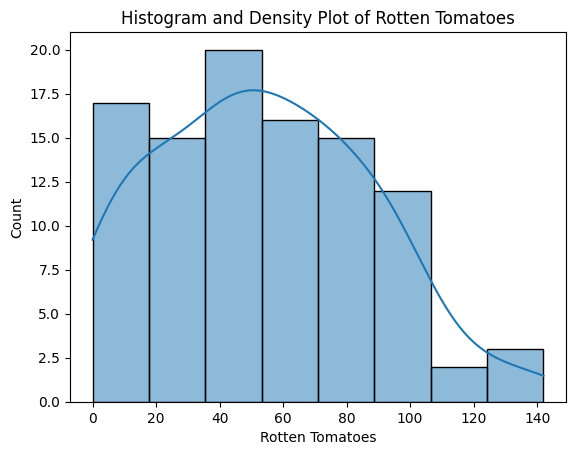

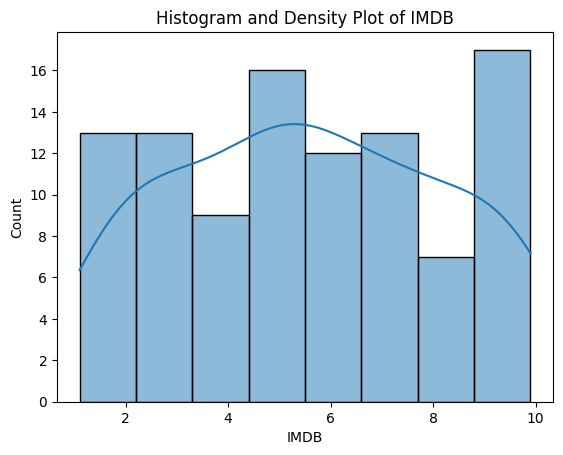

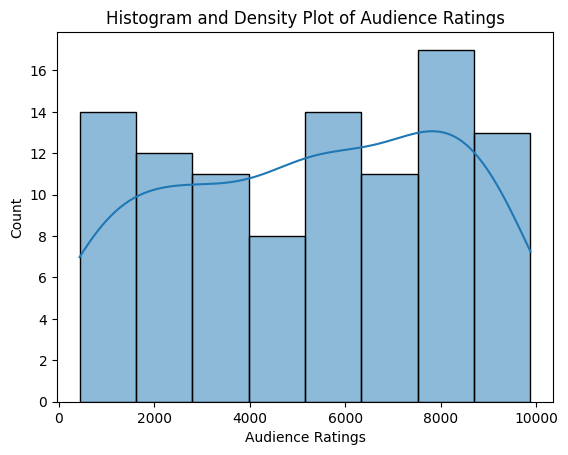

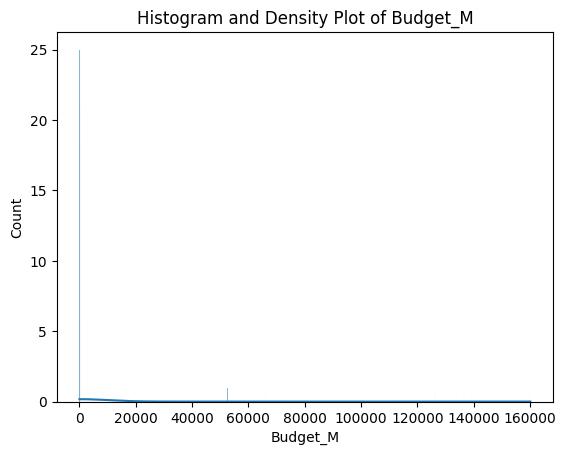

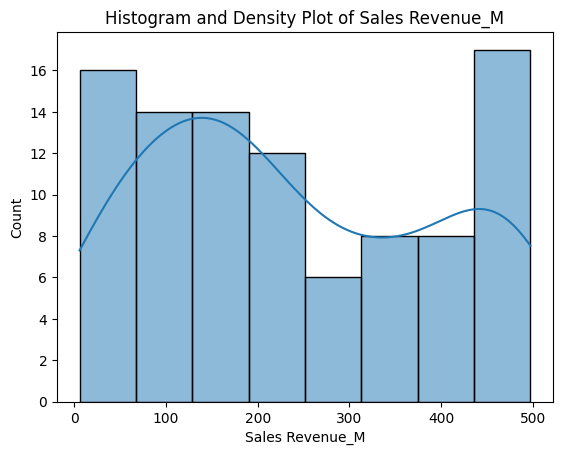

In [12]:
# Histograms and Density Plots for numerical variables
for col in movie_df.select_dtypes(include=['number']).columns:
    sns.histplot(movie_df[col],kde = True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

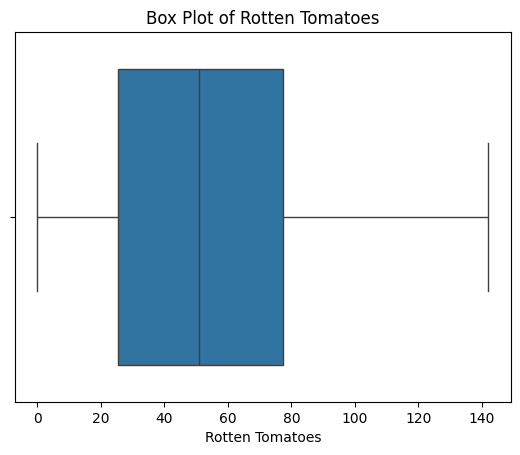

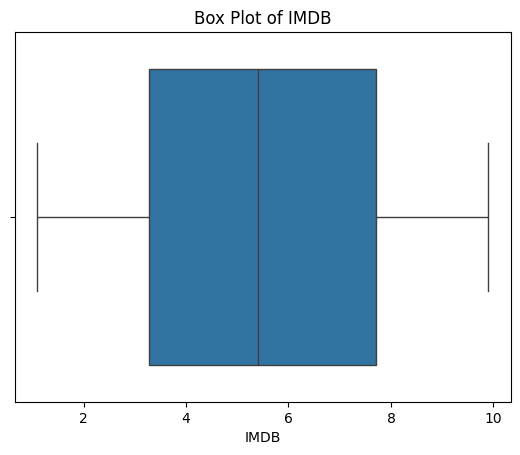

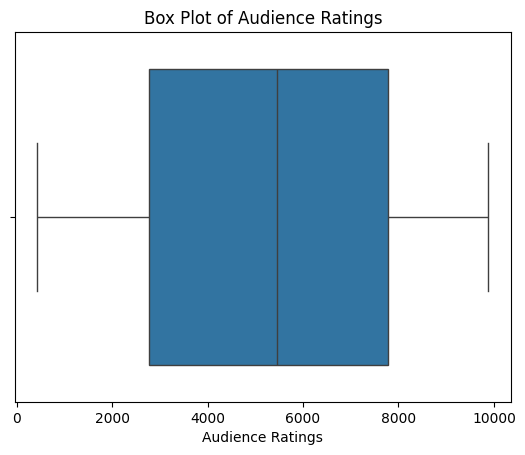

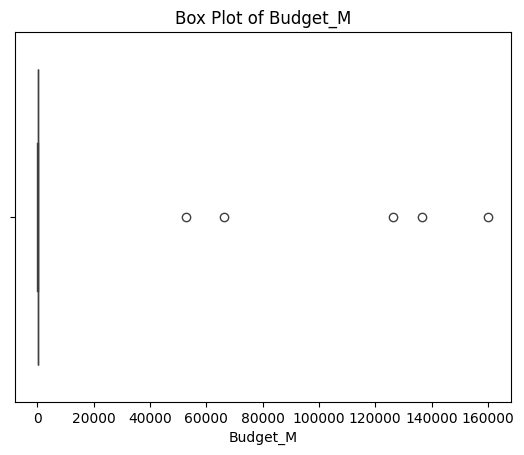

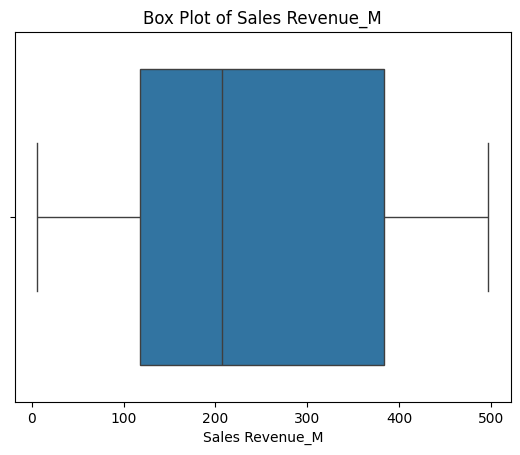

In [13]:
# Creating Boxplots
for col in movie_df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=movie_df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Pairwise Comparison

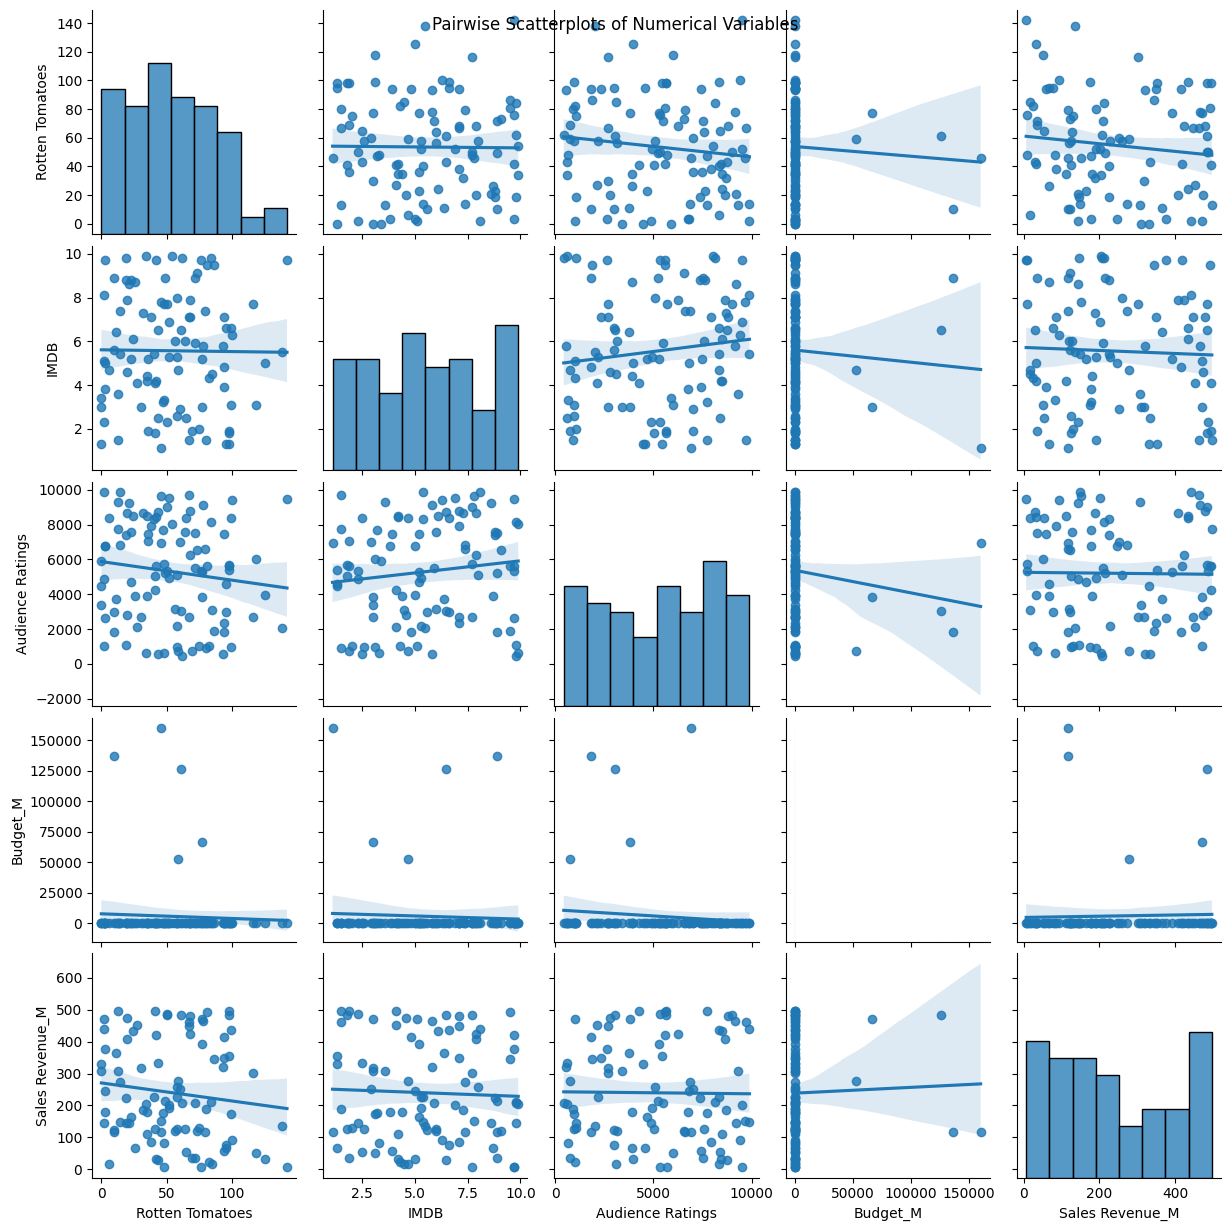

In [14]:
# Creating scatter plots for understanding the relationships between each variable
sns.pairplot(movie_df.select_dtypes(include=['number']), kind='reg') #creates a linear regression model to compare
plt.suptitle("Pairwise Scatterplots of Numerical Variables")
plt.show()

# Correlation Analysis

In [15]:
corr_mat=movie_df.corr()
corr_mat

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010413,-0.125519,-0.050979,-0.122859
IMDB,-0.010413,1.000000,0.126204,-0.053936,-0.041825
Audience Ratings,-0.125519,0.126204,1.000000,-0.114427,-0.012040
Budget_M,-0.050979,-0.053936,-0.114427,1.000000,0.030134
Sales Revenue_M,-0.122859,-0.041825,-0.012040,0.030134,1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap of Movie Variables')

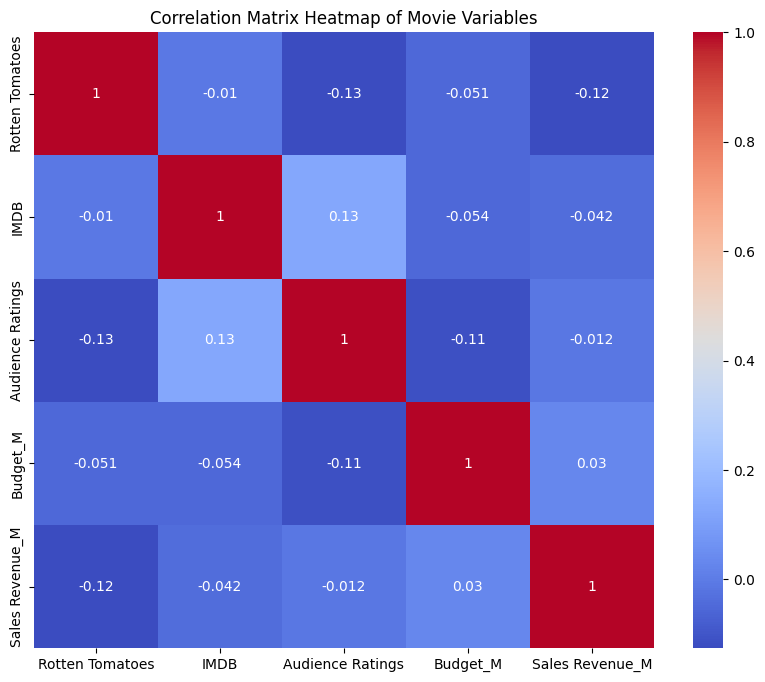

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Movie Variables')

#### Besides itself, the only positive correlation seems to be with Budget with a R-Value of 0.03

#### There seems to be a strong negative correlation with Sales Revenue and Rotten Tomatoes Score with an R-Value of -0.12

# Marketing Spend Analysis

## There appears to be a correlation of 0.03 between Budget_M and Sales_Revenue_M, which suggests that there is a very low chance that movie budget and sales correlate with each other

### Check heatmap from above to verify 

# Average Profits by Genre

In [37]:
# Extracting the columns Genre and Sales Revenue_M into a new dataframe called genre_sales
genre_sales=movie_df.iloc[:,[0,5]]
print(genre_sales)

       Genre  Sales Revenue_M
0     Horror        31.356476
1    Romance       212.016126
2      SciFi       129.342033
3     Action       424.519154
4   Thriller        16.652313
..       ...              ...
95    Action       302.058902
96     SciFi       191.404030
97  Thriller       447.692942
98    Sci-Fi       483.897336
99    Horror       273.442451

[100 rows x 2 columns]


In [39]:
# Checking which index in the df contains the maximum
genre_sales.max() 

Genre                Thriller
Sales Revenue_M    497.200395
dtype: object

### The genre with the highest sales revenue was from the Thriller Genre with a revenue of $497.2 M

# Noisy Data Analysis